# Problem Set 1
Due April 11th at 5:30pm -- at the start of the class so we can
discuss the solutions in class.

### Before You Start

Make sure to at least take a basic tutorial in the IPython notebook,
otherwise you'll be totally lost.  For this problem set, you should
download flights.csv.bz2 and weather.csv.bz2 datasets from
Canvas (files-data).   Rename the notebook to
LASTNAME_FIRSTNAME-PS1.ipynb.

When done, please submit
1. the notebook itself
2. the rendered html or pdf of it.



## About the Problem Set: 

This problem set is rather similar to ones used for R, dplyr, and
flights data.  Just we use python and pandas.

In this problem set you will perform a basic exploratory analysis on
an example dataset, bringing to bear all of your new skills in data
manipulation and visualization. You will be required to submit well
commented python code, documenting all code used in this problem set,
along with a write up answering all questions below. Use figures as
appropriate to support your answers, and when required by the problem.


## Preliminaries

You should also make sure the following libraries load correctly (click on the box below and hit Ctrl-Enter)

In [1]:
#IPython is what you are using now to run the notebook
import IPython
print( "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print( "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print( "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print( "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

import matplotlib.pyplot as plt


# Module for plotting
import matplotlib
print( "Mapltolib version:    %6.6s (need at least 1.2.1)" %
       matplotlib.__version__)
%matplotlib inline
# necessary for in-line graphics

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print( "Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       6.2.1 (need at least 1.0)
Numpy version:        1.14.0 (need at least 1.7.1)
SciPy version:         1.0.0 (need at least 0.12.0)
Pandas version:       0.22.0 (need at least 0.11.0)
Mapltolib version:     2.1.2 (need at least 1.2.1)
Scikit-Learn version: 0.19.1 (need at least 0.13.1)


In [2]:
## Let's read the data and print some summary information
## adjust the path for your file system!
flights_df= pd.read_csv('/Users/nandy/Downloads/flights.csv.bz2')

In [3]:
print ("Shape: \n",flights_df.shape)
print ("Columns: \n",flights_df.columns)
print ("Data type: \n",flights_df.dtypes)

Shape: 
 (336776, 17)
Columns: 
 Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Data type: 
 Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [4]:
flights_df.dest.unique()
flights_df.head(10)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


## Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc
* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

## Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [5]:
flights_nyc_to_sea_2013 = flights_df[np.logical_and(flights_df.year==2013,np.logical_and(flights_df.dest == 'SEA', np.logical_or(flights_df.origin == 'EWR',np.logical_or(flights_df.origin == 'LGA', flights_df.origin == 'JFK')) ))]
print("# Flights from NYC airport to Seattle in 2013:\n",flights_nyc_to_sea_2013.flight.count())


# Flights from NYC airport to Seattle in 2013:
 3923


There are 3923 flights from NYC to Seattle in 2013. 

This result is generated through the condition: (Origin is EWR, LGA or JFK) and Destination is Seattle and Year is 2013 

(b) How many airlines fly from NYC to Seattle?

In [6]:
print("# Distinct Airlines from NYC airport to Seattle:\n",len(flights_nyc_to_sea_2013.carrier.unique()))


# Distinct Airlines from NYC airport to Seattle:
 5


 Alaska, Delta, United, B6 and American Airlines fly from NYC airports to Seattle. Hence the count is 5. 
 
 Logic behind the code: Calculate the unique airlines & count the values by using len()

(c) How many unique air planes fly from NYC to Seattle?

In [8]:
print("Unique Airplanes from NYC airport to Seattle:\n",flights_nyc_to_sea_2013.flight.unique())
print("# Unique Airplanes from NYC airport to Seattle:\n",len(flights_nyc_to_sea_2013.flight.unique()))

Unique Airplanes from NYC airport to Seattle:
 [  11  495 1670   16   83 1715    7  269 1643 1416 1552 1043 1649 1889
  499  738 1100 1612 1171 1562 1642 1025 1515   15  183   63 1581  161
 1151  263  442    5  235  208  375  443  915  419  250  541 1162  324
 1149  238  321  654 1506  273  237  440 1672  364 1727 1246  214  676
 1915 1175  842  555   80 1453  280 1709 1698  533 1583 1502 1072  552
 1060  252   21  532  353 1211  578 1219 1462  685  641 1217 1925 1405
  112 1569 1288 1114 1218  339  554 1135 1293 1294 1571 1193 1654 1192
  175 1593 1236 1551  516  284 1630 1281 1443 1465 1568 1210  332  824
 1717  618  675 1481 1635  148 1242 1771 1543  299  267  278  318  543
 1108 1058  726  527  732  217  469 1102  436 1079  215  206 1533  387
  814 1577 1020 1245 1201  264  298  404  268 1123  671  256  441  457
  816  288 1049 1623  251  382  490  327  628 1579 1616  519]
# Unique Airplanes from NYC airport to Seattle:
 166


 Assuming that airplanes is Flight, there are 166 airplanes from NYC to Seattle.
 
 Logic: Calculate the unique airplanes and then count them using len()

(d) What is the average arrival delay for flights from NC to Seattle?

In [9]:
print("Average arrival delay from NYC airport to Seattle:\n",flights_nyc_to_sea_2013.arr_delay.mean())

Average arrival delay from NYC airport to Seattle:
 -1.0990990990990992


Average arrival delay is -1.099. So, on average flights land 1 min early. - Check with Professor

(e) What proportion of flights to Seattle come from each NYC airport?

In [10]:
nyc_seattle_grouped = pd.DataFrame(flights_nyc_to_sea_2013.groupby(['origin'])['flight'].count().reset_index(name='Count'))

print("Proportion Flights by origin:")
i=0
while i< len(nyc_seattle_grouped):
       print("\n", nyc_seattle_grouped.origin[i],":", round(nyc_seattle_grouped.Count[i]/sum(nyc_seattle_grouped.Count)*100),"%")
       i+=1



Proportion Flights by origin:

 EWR : 47.0 %

 JFK : 53.0 %


 47% of flights start from EWR, 57% from JFK and 0% from LGA airport. 

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [11]:
flight_dep_delay_day = pd.DataFrame(flights_df.groupby(['year','month','day'])['dep_delay'].mean().reset_index(name='Average_delay'))
#print(flight_delay_day)
print("\n",flight_dep_delay_day[flight_dep_delay_day.Average_delay == flight_dep_delay_day.Average_delay.max()])

flight_arr_delay_day = pd.DataFrame(flights_df.groupby(['year','month','day'])['arr_delay'].mean().reset_index(name='Average_delay'))
#print(flight_arr_delay_day)
print("\n",flight_arr_delay_day[flight_arr_delay_day.Average_delay == flight_arr_delay_day.Average_delay.max()])


     year  month  day  Average_delay
66  2013      3    8      83.536921

     year  month  day  Average_delay
66  2013      3    8      85.862155


March 8,2013 is the day with highest average departure and arrival delay

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [12]:
flight_dep_delay_day = pd.DataFrame(flights_df.groupby(['year','month','day'])['dep_delay'].mean().reset_index(name='Average_delay'))
print("\n",flight_dep_delay_day[flight_dep_delay_day.Average_delay == flight_dep_delay_day.Average_delay.max()])



     year  month  day  Average_delay
66  2013      3    8      83.536921


Worst day to fly out would be 8th March 2013.

(c) Are there any seasonal patterns in departure delays for flights from NYC?

In [13]:
flight_dep_delay_month = pd.DataFrame(flights_df.groupby(['year','month'])['dep_delay'].mean().reset_index(name='Average_delay'))
print("\n",flight_dep_delay_month)



     year  month  Average_delay
0   2013      1      10.036665
1   2013      2      10.816843
2   2013      3      13.227076
3   2013      4      13.938038
4   2013      5      12.986859
5   2013      6      20.846332
6   2013      7      21.727787
7   2013      8      12.611040
8   2013      9       6.722476
9   2013     10       6.243988
10  2013     11       5.435362
11  2013     12      16.576688


Average delay by month is highest during the summer months, followed by Christmas period.

(d) On average, how do departure delays vary over the course of a day?

In [14]:
flight_dep_delay = pd.DataFrame(flights_df.groupby(['hour']).agg({'dep_delay':'mean','flight':'count'}).reset_index())
flight_dep_delay.columns = ['hour','Average_delay','Flights_count']
print("\n",flight_dep_delay)


     hour  Average_delay  Flights_count
0    0.0     128.642452            881
1    1.0     207.049327            223
2    2.0     239.921875             64
3    3.0     304.727273             11
4    4.0      -5.554098            305
5    5.0      -4.355644           7246
6    6.0      -1.520552          22699
7    7.0       0.223289          21461
8    8.0       1.091432          26424
9    9.0       4.268295          18871
10  10.0       5.548644          16076
11  11.0       5.652309          16762
12  12.0       7.601892          16071
13  13.0       9.380639          16890
14  14.0       8.090381          20480
15  15.0      10.682049          22840
16  16.0      13.621150          22336
17  17.0      16.756593          22144
18  18.0      18.664671          21549
19  19.0      21.497342          19940
20  20.0      28.266213          16160
21  21.0      42.064964          10960
22  22.0      68.190042           5483
23  23.0      96.946865           2616
24  24.0      64.862069

Flights which start early in the day have very low departure delay and chances of delay increases in the later part of day. 

Though delay time is more in the time from 0AM to 3AM, # flights is very low, to make a decision.

## Question 3
   Which flight departing NYC in 2013 flew the fastest?

In [15]:
flights_df['flight_speed']=flights_df.distance/flights_df.air_time
print("\n Flight with highest speed",flights_df[flights_df.flight_speed == flights_df.flight_speed.max()])



 Flight with highest speed         Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  \
216447      216448  2013      5   25    1709.0        9.0    1923.0   

        arr_delay carrier tailnum  flight origin dest  air_time  distance  \
216447      -14.0      DL  N666DN    1499    LGA  ATL      65.0       762   

        hour  minute  flight_speed  
216447  17.0     9.0     11.723077  


Delta Flight from LGA to ATL on 25th May 2013 flew the fastest

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [16]:

flight_everyday = pd.DataFrame(flights_df.groupby(['flight','carrier','dest','year','month','day'])['flight'].count().reset_index(name="F_count"))
flight_everyday_2 = pd.DataFrame(flight_everyday.groupby(['flight','carrier','dest'])['flight'].count().reset_index(name="F_count"))

print(flight_everyday_2[flight_everyday_2.F_count>=365])

       flight carrier dest  F_count
42         15      UA  HNL      365
148        59      AA  SFO      365
277       119      AA  LAX      365
396       181      AA  LAX      365
565       219      B6  CLT      365
783       251      VX  LAS      365
1437      359      B6  BUR      365
1505      371      B6  FLL      365
1739      407      VX  LAX      365
1769      413      VX  LAX      365
1878      431      B6  SRQ      365
3243      703      B6  SJU      365
5551     1357      AA  SJU      365
6416     1611      AA  MIA      365
7015     1783      B6  MCO      365
7412     2159      DL  MCO      365
7551     2391      DL  TPA      365
11395    5712      EV  IAD      365


Above flights travel everyday. Most of them travel to West Coast. 

Logic: First step: group by flight combination and date - this would ensure that if there is any flight travels 2 times on the same day, it will be be grouped into a single record.
Second step: group by Flight combination & check which flights fly everyday

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


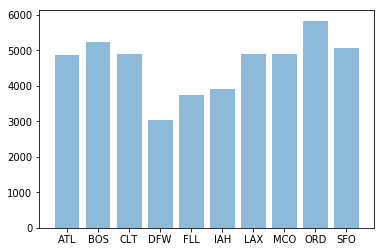

In [104]:
flights_df_dest = pd.DataFrame(flight_weather.groupby(['dest']).agg({'flight':'count'}).reset_index())

#Research question: Which locations have lot of flight options from NYC, and which are most delayed?

#top 10 destinations with most flights out of NYC
flights_df_dest = flights_df_dest.sort_values(by=['flight'], ascending=False)
flights_df_dest1=flights_df_dest[:10]
plt.bar(flights_df_dest1.dest, flights_df_dest1.flight, align='center', alpha=0.5)

plt.show()

The above chart represents the airports with most flights out of NYC.

<Container object of 10 artists>

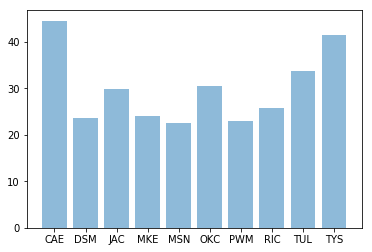

In [106]:
#top 10 destinations with most departure delays for flights from NYC
flights_df_dest_delay = pd.DataFrame(flight_weather.groupby(['dest']).agg({'arr_delay':'mean'}).reset_index())
flights_df_dest_delay2 = flights_df_dest_delay.sort_values(by=['arr_delay'], ascending=False)
flights_df_dest_delay1=flights_df_dest_delay2[:10]
plt.bar(flights_df_dest_delay1.dest, flights_df_dest_delay1.arr_delay, align='center', alpha=0.5)

#plt.show()

The above chart represents the airports with most arrival delays for flights out of NYC.

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

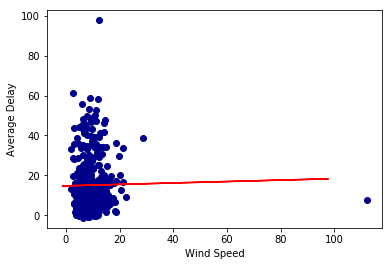

In [73]:
weather_df= pd.read_csv('/Users/nandy/Downloads/weather.csv.bz2')

flight_weather= pd.merge(flights_df, weather_df, on=['year', 'month','day','origin','hour'])

flight_weather_avg = pd.DataFrame(flight_weather.groupby(['year','month','day']).agg({'wind_speed':'mean','visib':'mean','wind_dir':'mean','pressure':'mean','precip':'mean','wind_gust':'mean','dewp':'mean','humid':'mean','temp':'mean','dep_delay':'mean','flight':'count'}).reset_index())
flight_weather_avg.columns = ['year','month','day','wind_speed','visib','wind_dir','pressure','precip','wind_gust','dewp','humid','temp','Average_delay','Flights_count']

def best_fit(X, Y):
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)
    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2
    b = numer / denum
    a = ybar - b * xbar
    return a, b

# solution

# plot points and fit line

def plot_chart1(X, Y, Z):
    a, b = best_fit(X, Y)
    plt.scatter(X,Y,color='darkblue')
    yfit = [a + b * xi for xi in Y]
    plt.plot(Y, yfit,color='red')
    plt.xlabel(Z)
    plt.ylabel("Average Delay")

#plot_chart1(flight_weather_avg.Average_delay, flight_weather_avg.wind_speed,"Wind Speed")
plot_chart1(flight_weather_avg.wind_speed, flight_weather_avg.Average_delay,"Wind Speed")



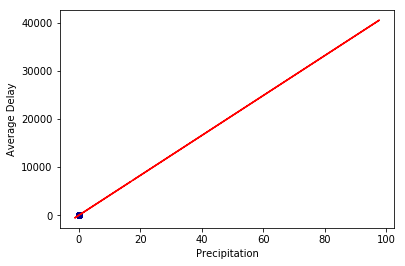

In [74]:
plot_chart1(flight_weather_avg.precip, flight_weather_avg.Average_delay,"Precipitation")

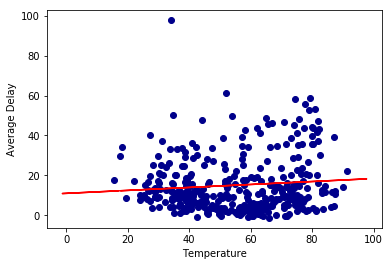

In [75]:
plot_chart1(flight_weather_avg.temp, flight_weather_avg.Average_delay,"Temperature")

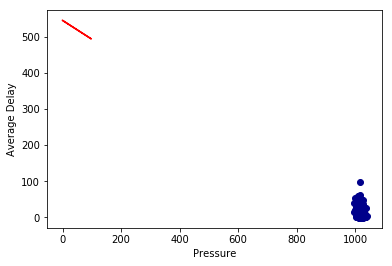

In [76]:
plot_chart1(flight_weather_avg.pressure, flight_weather_avg.Average_delay,"Pressure")

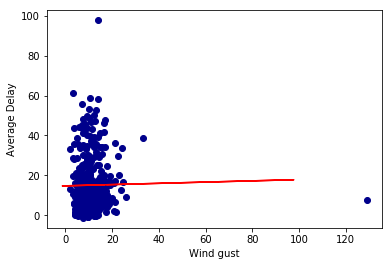

In [77]:
plot_chart1(flight_weather_avg.wind_gust, flight_weather_avg.Average_delay,"Wind gust")

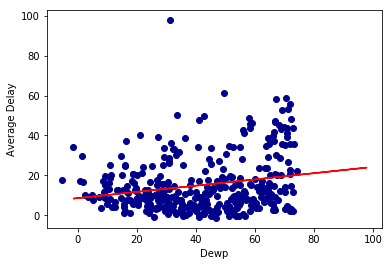

In [78]:
plot_chart1(flight_weather_avg.dewp, flight_weather_avg.Average_delay,"Dewp")

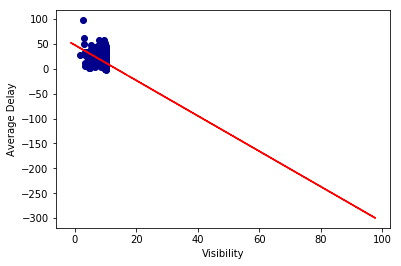

In [79]:
plot_chart1(flight_weather_avg.visib, flight_weather_avg.Average_delay,"Visibility")

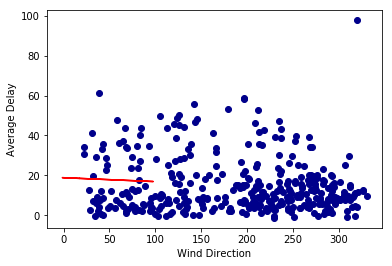

In [80]:
plot_chart1(flight_weather_avg.wind_dir, flight_weather_avg.Average_delay,"Wind Direction")

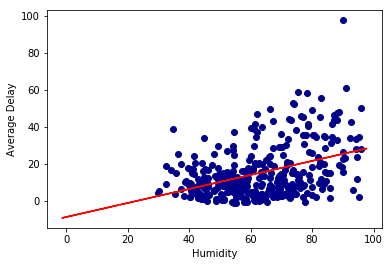

In [81]:
plot_chart1(flight_weather_avg.humid, flight_weather_avg.Average_delay,"Humidity")

Of the 9 weather factors available in weather data, only Humidity and Dewp seem to have effect on delay time. 